# Union de todos los datos para analisis
## datasets
- vivienda_consolidado_departamento
- total-hogares-1993-2024
- total-viviendas-1993-2024

In [1]:
# obtiene todos los datos

import pandas as pd

file_sub_viviendas = '../data/processed/vivienda_consolidado_departamento.csv'
df_sub_viviendas = pd.read_csv(file_sub_viviendas)

# cambia nombre de columna "Código Divipola Departamento" a Código Departamento
df_sub_viviendas = df_sub_viviendas.rename(columns={'Código Divipola Departamento': 'Código Departamento'})
df_sub_viviendas = df_sub_viviendas.rename(columns={'Departamento': 'Nombre Departamento'})
df_sub_viviendas = df_sub_viviendas.rename(columns={'Año de Asignación': 'Año'})

# convierte el tipo de dato de la columna "Año" a object
# df_sub_viviendas["Año"]= df_sub_viviendas["Año"].astype('object')
df_sub_viviendas.head()

,Nombre Departamento,Código Departamento,Programa,Estado de Postulación,Año,Hogares,Valor Asignado
0,ANTIOQUIA,5,Bolsa Atentados terroristas,Apto con subsidio vencido,2003,20,1.257277e+08
1,ANTIOQUIA,5,Bolsa Atentados terroristas,Asignados,2003,69,4.635713e+08
2,ANTIOQUIA,5,Bolsa Desastres Naturales,Apto con subsidio vencido,2003,1,7.636000e+06
3,ANTIOQUIA,5,Bolsa Desastres Naturales,Asignados,2003,709,5.413924e+09
4,ANTIOQUIA,5,Bolsa Desastres Naturales,Renuncias al subsidio,2003,1,7.636000e+06


In [2]:
file_total_viviendas = '../data/processed/total-viviendas-1993-2024.csv'
df_total_viviendas = pd.read_csv(file_total_viviendas)
df_total_viviendas = df_total_viviendas.drop(['Unnamed: 0'], axis=1)

df_total_viviendas.head()

,Código Departamento,Nombre Departamento,Área,Año,Viviendas
0,5,Antioquia,Total,1993,1026087
1,5,Antioquia,Total,1994,1057351
2,5,Antioquia,Total,1995,1088549
3,5,Antioquia,Total,1996,1119328
4,5,Antioquia,Total,1997,1149513


In [3]:
file_total_hogares = '../data/processed/total-hogares-1993-2024.csv'
df_total_hogares = pd.read_csv(file_total_hogares)
df_total_hogares = df_total_hogares.drop(['Unnamed: 0'], axis=1)


df_total_hogares.head()

,Código Departamento,Nombre Departamento,Área,Año,Hogares
0,5,Antioquia,Total,1993,1076115
1,5,Antioquia,Total,1994,1108446
2,5,Antioquia,Total,1995,1140636
3,5,Antioquia,Total,1996,1172306
4,5,Antioquia,Total,1997,1203264


In [4]:
# unir los dataframes por departamento y año 
df_hogares_viviendas= pd.merge(df_total_hogares, df_total_viviendas, on=['Código Departamento', 'Nombre Departamento', 'Área', 'Año'], how='inner')

# cambia nombre Hogares a senso hogares
df_hogares_viviendas= df_hogares_viviendas.rename( columns={'Hogares': 'Senso Hogares'})
df_hogares_viviendas= df_hogares_viviendas.rename( columns={'Viviendas': 'Senso Viviendas'})

df_hogares_viviendas.head()

,Código Departamento,Nombre Departamento,Área,Año,Senso Hogares,Senso Viviendas
0,5,Antioquia,Total,1993,1076115,1026087
1,5,Antioquia,Total,1994,1108446,1057351
2,5,Antioquia,Total,1995,1140636,1088549
3,5,Antioquia,Total,1996,1172306,1119328
4,5,Antioquia,Total,1997,1203264,1149513


In [5]:
# eliminar las filas de la columna "Año" que sean iguales a 1993
df_hogares_viviendas = df_hogares_viviendas[df_hogares_viviendas['Año'] != "Unnamed: 0"]

In [6]:
# cambiar el tipo de dato de la columna "Año" a int64
df_hogares_viviendas["Año"] = df_hogares_viviendas["Año"].astype('int64')

In [7]:
df_hogares_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, 0 to 1087
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Código Departamento  1056 non-null   int64 
 1   Nombre Departamento  1056 non-null   object
 2   Área                 1056 non-null   object
 3   Año                  1056 non-null   int64 
 4   Senso Hogares        1056 non-null   int64 
 5   Senso Viviendas      1056 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 57.8+ KB


In [8]:
df_sub_viviendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre Departamento    6747 non-null   object 
 1   Código Departamento    6747 non-null   int64  
 2   Programa               6747 non-null   object 
 3   Estado de Postulación  6747 non-null   object 
 4   Año                    6747 non-null   int64  
 5   Hogares                6747 non-null   int64  
 6   Valor Asignado         6747 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 369.1+ KB


In [9]:
# unir dataframe df_hogares_viviendas con df_sub_viviendas
df_merged = pd.merge(
    df_sub_viviendas,
    df_hogares_viviendas,
    on=["Código Departamento", "Año"],
    how="inner"
)
# eliminar Nombre Departamento_y 
df_merged = df_merged.drop(['Nombre Departamento_y'], axis=1)
# eliminar Area
df_merged = df_merged.drop(['Área'], axis=1)

# cambiar el nombre de la columna "Nombre Departamento_x" a "Nombre Departamento"
df_merged = df_merged.rename(columns={'Nombre Departamento_x': 'Nombre Departamento'})

df_merged.head()


,Nombre Departamento,Código Departamento,Programa,Estado de Postulación,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas
0,ANTIOQUIA,5,Bolsa Atentados terroristas,Apto con subsidio vencido,2003,20,1.257277e+08,1369857,1314326
1,ANTIOQUIA,5,Bolsa Atentados terroristas,Asignados,2003,69,4.635713e+08,1369857,1314326
2,ANTIOQUIA,5,Bolsa Desastres Naturales,Apto con subsidio vencido,2003,1,7.636000e+06,1369857,1314326
3,ANTIOQUIA,5,Bolsa Desastres Naturales,Asignados,2003,709,5.413924e+09,1369857,1314326
4,ANTIOQUIA,5,Bolsa Desastres Naturales,Renuncias al subsidio,2003,1,7.636000e+06,1369857,1314326


In [10]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre Departamento    6747 non-null   object 
 1   Código Departamento    6747 non-null   int64  
 2   Programa               6747 non-null   object 
 3   Estado de Postulación  6747 non-null   object 
 4   Año                    6747 non-null   int64  
 5   Hogares                6747 non-null   int64  
 6   Valor Asignado         6747 non-null   float64
 7   Senso Hogares          6747 non-null   int64  
 8   Senso Viviendas        6747 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 474.5+ KB


In [11]:
# guardar el dataframe en un archivo csv
df_merged.to_csv('../data/processed/datos_completos_viviendas.csv')

# Graficar con los datos


In [12]:
df_merged.describe()

,Código Departamento,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas
count,6747.000000,6747.000000,6747.000000,6.747000e+03,6.747000e+03,6.747000e+03
mean,42.036757,2011.760041,139.158589,2.808288e+09,5.680272e+05,5.340419e+05
std,27.029710,5.926150,593.165304,1.519373e+10,5.612879e+05,5.305068e+05
min,5.000000,2003.000000,1.000000,9.198300e+04,4.546000e+03,3.936000e+03
25%,17.000000,2007.000000,2.000000,2.068365e+07,2.518090e+05,2.362190e+05
50%,44.000000,2010.000000,6.000000,8.253000e+07,3.731000e+05,3.500310e+05
75%,68.000000,2017.000000,47.000000,5.496536e+08,5.740170e+05,5.203770e+05
max,99.000000,2024.000000,14434.000000,3.631021e+11,3.072358e+06,2.904747e+06


In [13]:
# Conteo de registros por Estado de postulación
conteo_estados = df_merged.groupby("Estado de Postulación").size().reset_index(name="Conteo")
print(conteo_estados)

# Conteo por Programa y Año
conteo_programa_anio = df_merged.groupby(["Programa", "Año"]).size().reset_index(name="Conteo")
print(conteo_programa_anio)

                                Estado de Postulación  Conteo
0                           Apto con subsidio vencido    1069
1   Asignado (en demanda de nulidad y restablecimi...       2
2               Asignado con Aplicación en Mi Casa Ya       1
3        Asignado con aplicación en Vivienda Gratuita     219
4   Asignado posteriormente beneficiario de Vivien...      18
5                                 Asignado sancionado       2
6                                           Asignados    2602
7              En sistema no en resolucion depuración       2
8                                Pendiente de Revocar       1
9                   Pendiente de Sanción por Falsedad       1
10      Perdida de ejecutoriedad de asignación de SFV     392
11         Realizó cambio de proyecto, hogar asignado       2
12                          Renuncia a la postulación      27
13    Renuncia al Subsidio - Pendiente de Restitución      21
14               Renuncia con restitucion de subsidio     597
15      

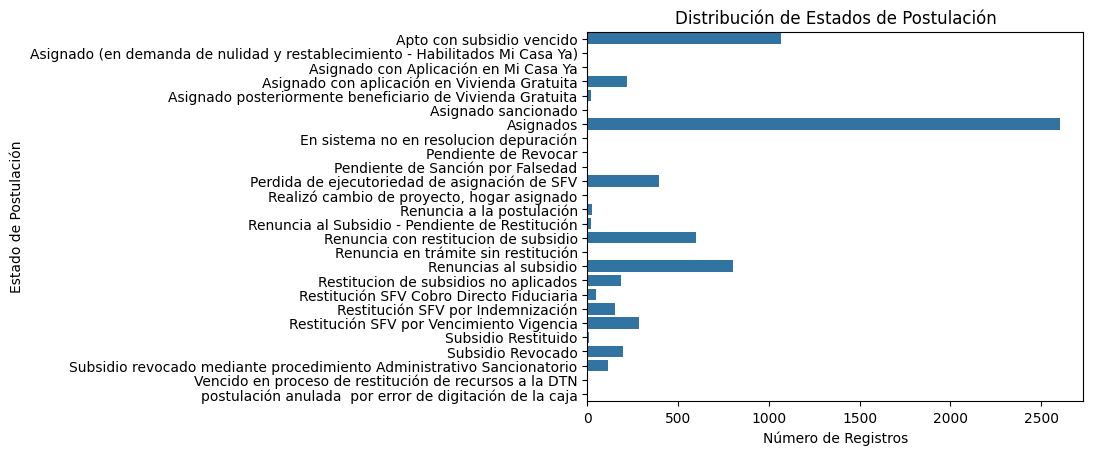

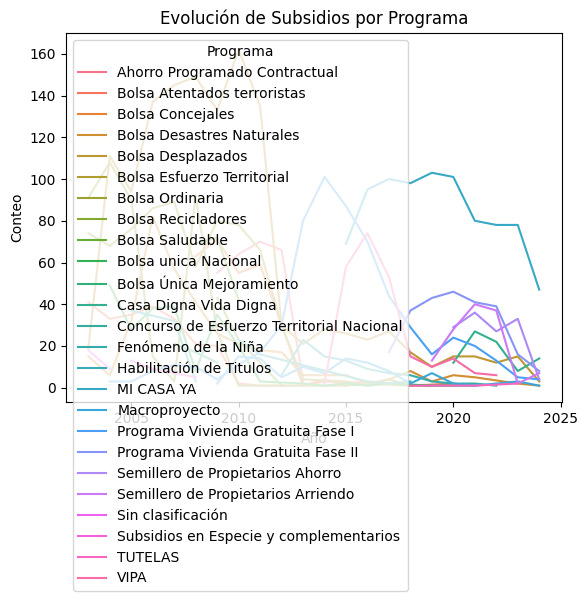

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar distribución de Estados
sns.barplot(x="Conteo", y="Estado de Postulación", data=conteo_estados)
plt.title("Distribución de Estados de Postulación")
plt.xlabel("Número de Registros")
plt.ylabel("Estado de Postulación")
plt.show()

# Evolución de programas a lo largo del tiempo
sns.lineplot(x="Año", y="Conteo", hue="Programa", data=conteo_programa_anio)
plt.title("Evolución de Subsidios por Programa")
plt.show()


In [15]:
# importar seaborn y matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

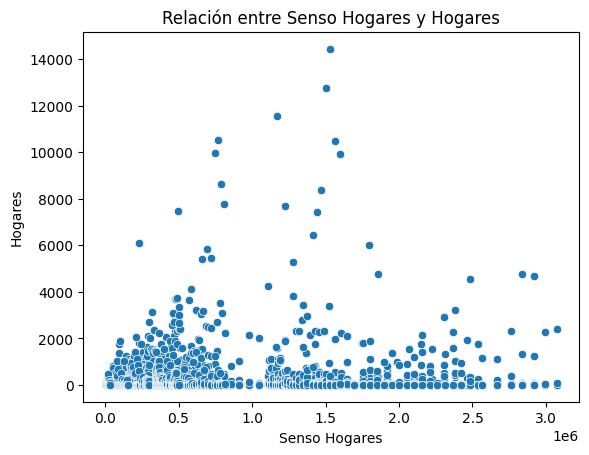

In [16]:
sns.scatterplot(x="Senso Hogares", y="Hogares", data=df_merged)
plt.title('Relación entre Senso Hogares y Hogares')
plt.xlabel('Senso Hogares')
plt.ylabel('Hogares')
plt.show()


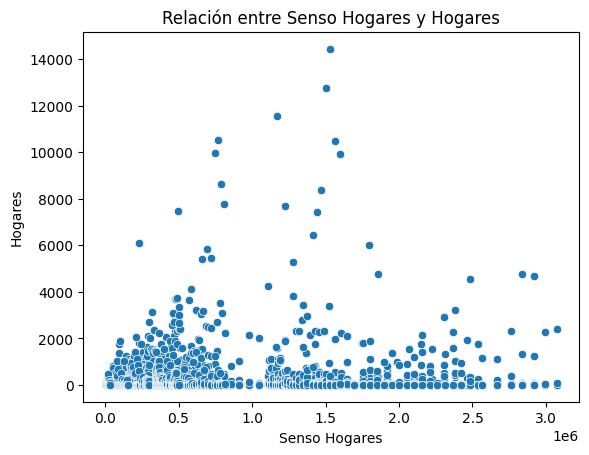

In [17]:
# grafica para el programa mi casa ya 

sns.scatterplot(x="Senso Hogares", y="Hogares",  data=df_merged)
plt.title('Relación entre Senso Hogares y Hogares')
plt.xlabel('Senso Hogares')
plt.ylabel('Hogares')
plt.show()

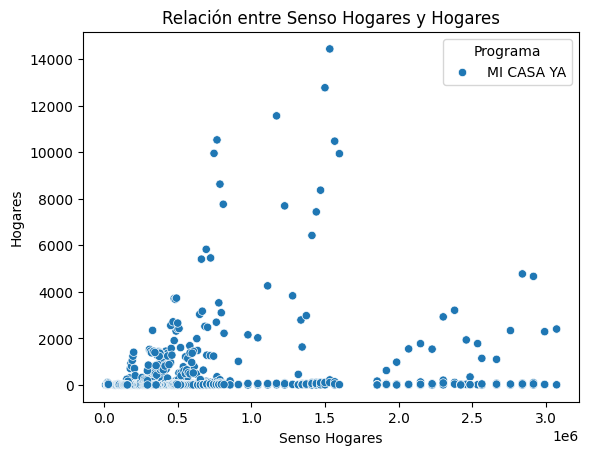

In [18]:
# grafica cuando el programa es bolsa atentados terroristas
sns.scatterplot(x="Senso Hogares", y="Hogares", hue="Programa", data=df_merged[df_merged["Programa"] == "MI CASA YA"])
plt.title('Relación entre Senso Hogares y Hogares')
plt.xlabel('Senso Hogares')
plt.ylabel('Hogares')
plt.show()

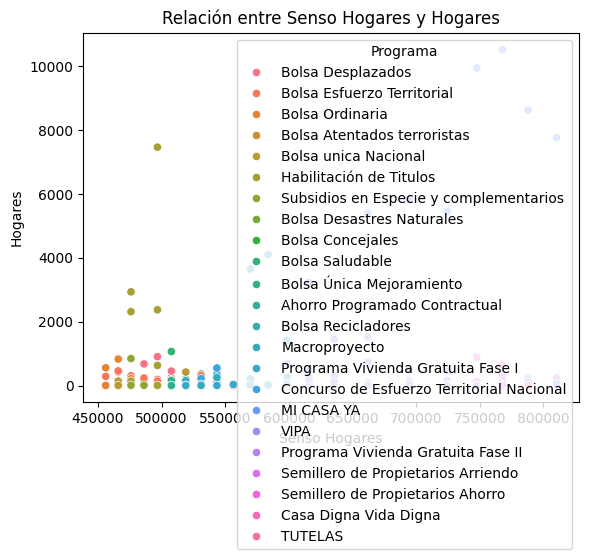

In [19]:
# grafica cuando el codigo de departamento es 5
sns.scatterplot(x="Senso Hogares", y="Hogares", hue="Programa", data=df_merged[df_merged["Código Departamento"] == 8])
plt.title('Relación entre Senso Hogares y Hogares')
plt.xlabel('Senso Hogares')
plt.ylabel('Hogares')
plt.show()

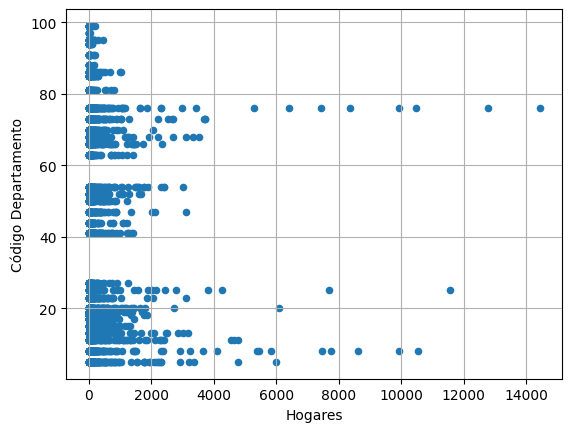

In [20]:
df_merged.plot(kind="scatter", x="Hogares", y="Código Departamento", grid=True)
plt.show()

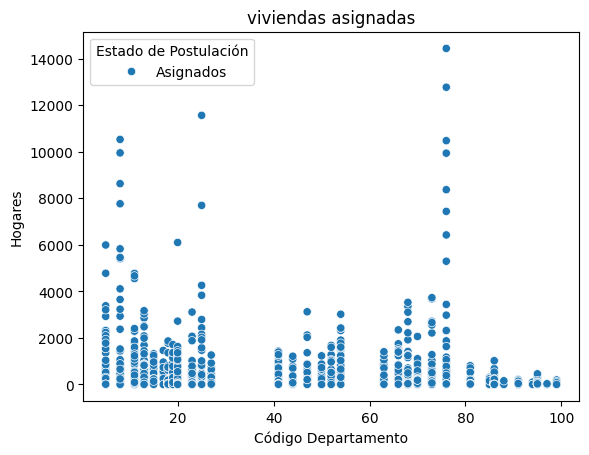

In [21]:
# grafica cuando el estado de postulación es asignados
sns.scatterplot(x="Código Departamento", y="Hogares", hue="Estado de Postulación", data=df_merged[df_merged["Estado de Postulación"] == "Asignados"])
plt.title("viviendas asignadas")
plt.xlabel('Código Departamento')
plt.ylabel('Hogares')
plt.show()

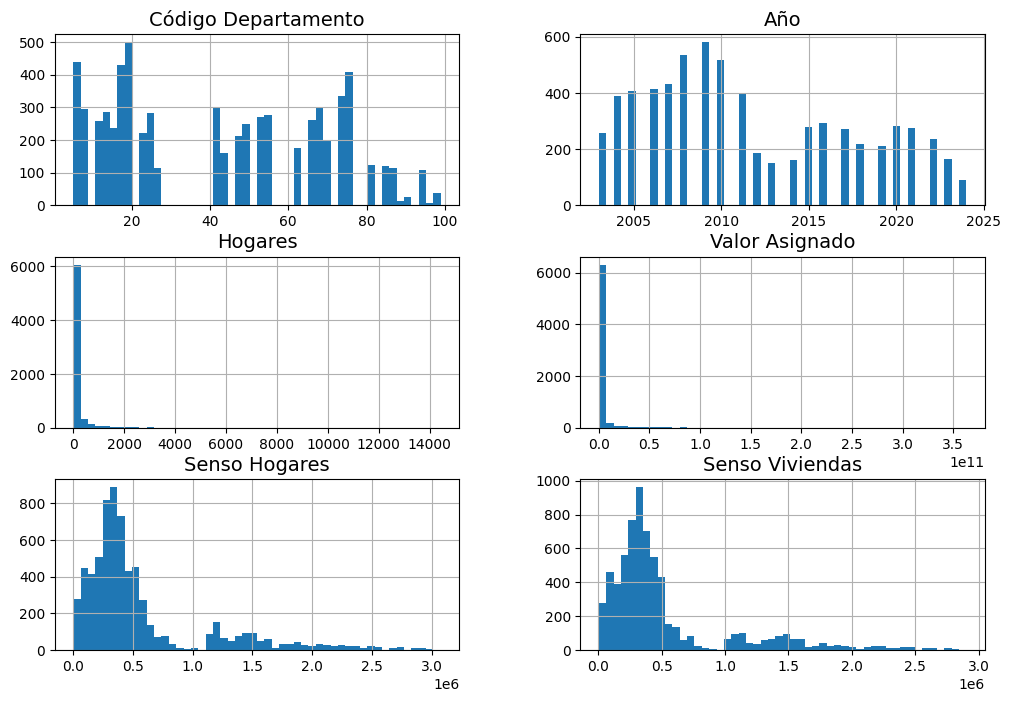

In [22]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_merged.hist(bins=50, figsize=(12, 8))
plt.show()

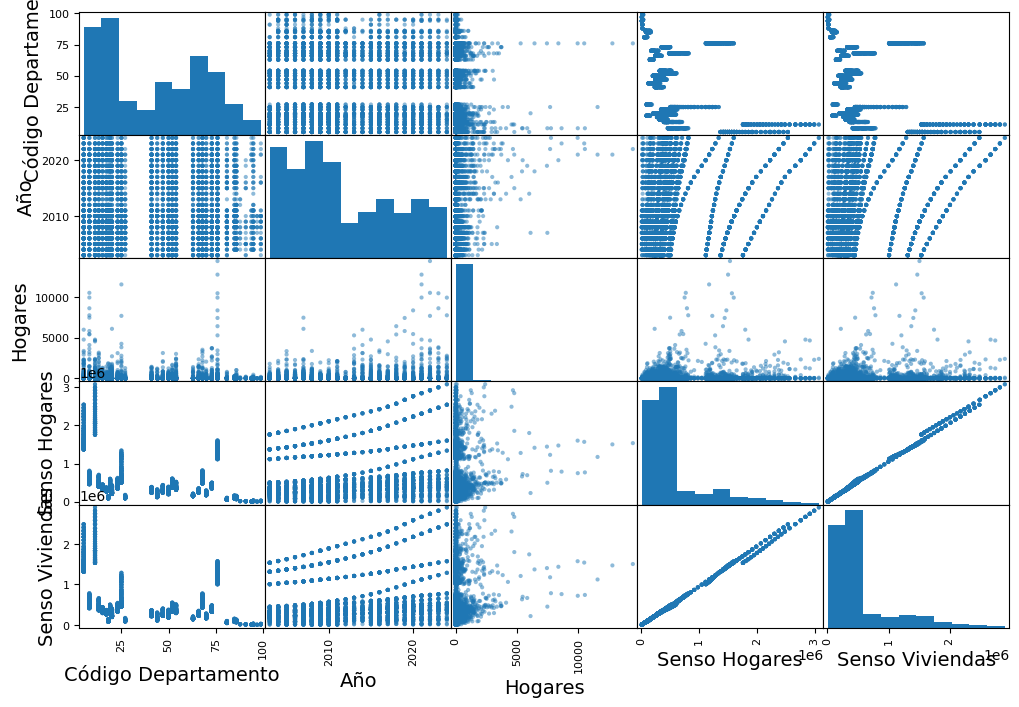

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["Código Departamento", "Programa", "Estado de Postulación",
              "Año", "Hogares","Senso Hogares","Senso Viviendas"]
scatter_matrix(df_merged[attributes], figsize=(12, 8))
plt.show()

# Codificación de los datos

In [24]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [25]:
## obtener la informacion de los datos
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre Departamento    6747 non-null   object 
 1   Código Departamento    6747 non-null   int64  
 2   Programa               6747 non-null   object 
 3   Estado de Postulación  6747 non-null   object 
 4   Año                    6747 non-null   int64  
 5   Hogares                6747 non-null   int64  
 6   Valor Asignado         6747 non-null   float64
 7   Senso Hogares          6747 non-null   int64  
 8   Senso Viviendas        6747 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 474.5+ KB


In [26]:
df_merged.describe()

,Código Departamento,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas
count,6747.000000,6747.000000,6747.000000,6.747000e+03,6.747000e+03,6.747000e+03
mean,42.036757,2011.760041,139.158589,2.808288e+09,5.680272e+05,5.340419e+05
std,27.029710,5.926150,593.165304,1.519373e+10,5.612879e+05,5.305068e+05
min,5.000000,2003.000000,1.000000,9.198300e+04,4.546000e+03,3.936000e+03
25%,17.000000,2007.000000,2.000000,2.068365e+07,2.518090e+05,2.362190e+05
50%,44.000000,2010.000000,6.000000,8.253000e+07,3.731000e+05,3.500310e+05
75%,68.000000,2017.000000,47.000000,5.496536e+08,5.740170e+05,5.203770e+05
max,99.000000,2024.000000,14434.000000,3.631021e+11,3.072358e+06,2.904747e+06


In [27]:
# agrega una nueva columna con deficit de hogares
df_merged["Deficit Hogares"] = df_merged["Senso Hogares"] - df_merged["Senso Viviendas"]


In [28]:
# dejar tres categorias en la columna "Estado de Postulación"
def categorizar_estados_postulacion(row):
    # si encuentra palabra asignado, Asignado, Asignados, asignados
    if "Asignado" in row["Estado de Postulación"]:
        return "Ejecutado"
    elif "Renuncia" in row["Estado de Postulación"] or "Vencido" in row["Estado de Postulación"]:
        return "No ejecutado"
    else:
        return "Pendiente"

In [29]:
df_merged["Categoria Estado"] = df_merged.apply(categorizar_estados_postulacion, axis=1)

In [30]:
df_merged["Programa"].value_counts()

Programa
Bolsa Desplazados                            1327
MI CASA YA                                    849
Bolsa Esfuerzo Territorial                    719
Programa Vivienda Gratuita Fase I             590
Bolsa Ordinaria                               432
Bolsa Desastres Naturales                     358
Ahorro Programado Contractual                 258
Bolsa Concejales                              254
Programa Vivienda Gratuita Fase II            247
VIPA                                          239
Bolsa Atentados terroristas                   234
Bolsa unica Nacional                          230
Bolsa Saludable                               183
Semillero de Propietarios Ahorro              129
Semillero de Propietarios Arriendo            127
Macroproyecto                                 105
Fenómeno de la Niña                            87
Casa Digna Vida Digna                          83
Habilitación de Titulos                        72
Bolsa Recicladores                       

In [31]:
# Lista única de departamentos
departamentos_unicos = df_merged['Código Departamento'].nunique()

# Crear el campo "Cobertura"
def determinar_cobertura(programa, df):
    # Filtrar el dataset por el programa
    df_programa = df[df['Programa'] == programa]
    # Contar los departamentos únicos para este programa
    departamentos_por_programa = df_programa['Código Departamento'].nunique()
    # Si cubre todos los departamentos, es nacional; si no, departamental
    if departamentos_por_programa == departamentos_unicos:
        return "Nacional"
    else:
        return "Departamental"

# Aplicar la función para cada programa
df_merged['Cobertura'] = df_merged['Programa'].apply(lambda programa: determinar_cobertura(programa, df_merged))

In [32]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6747 entries, 0 to 6746
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre Departamento    6747 non-null   object 
 1   Código Departamento    6747 non-null   int64  
 2   Programa               6747 non-null   object 
 3   Estado de Postulación  6747 non-null   object 
 4   Año                    6747 non-null   int64  
 5   Hogares                6747 non-null   int64  
 6   Valor Asignado         6747 non-null   float64
 7   Senso Hogares          6747 non-null   int64  
 8   Senso Viviendas        6747 non-null   int64  
 9   Deficit Hogares        6747 non-null   int64  
 10  Categoria Estado       6747 non-null   object 
 11  Cobertura              6747 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 632.7+ KB


# para poder borrar 

In [33]:
# # dejar solo la cobertura departamental
# df_merged = df_merged[df_merged["Cobertura"] == "Departamental"]
# df_merged.head()

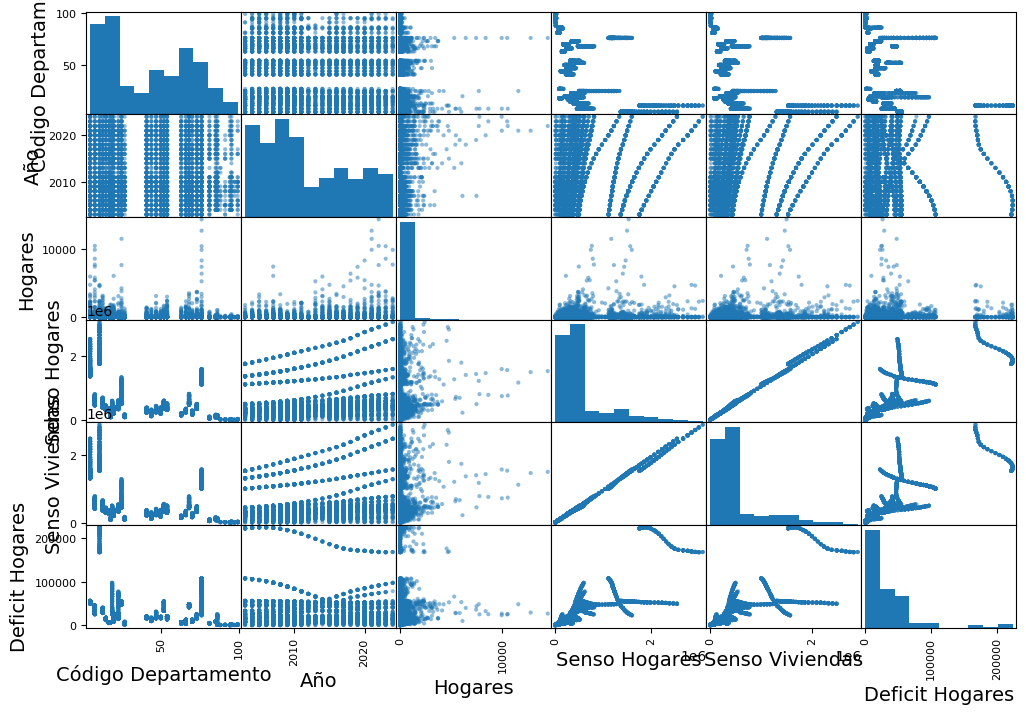

In [34]:
from pandas.plotting import scatter_matrix

attributes = ["Código Departamento", "Programa", "Estado de Postulación",
              "Año", "Hogares","Senso Hogares","Senso Viviendas", "Deficit Hogares","Categoria Estado", "Cobertura"]
scatter_matrix(df_merged[attributes], figsize=(12, 8))
plt.show()

## Datos numéricos

In [35]:
import numpy as np
np.random.seed(42)

subsidio_viviendas_numeric = df_merged.select_dtypes(include=[np.number])

subsidio_viviendas_numeric

,Código Departamento,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas,Deficit Hogares
0,5,2003,20,1.257277e+08,1369857,1314326,55531
1,5,2003,69,4.635713e+08,1369857,1314326,55531
2,5,2003,1,7.636000e+06,1369857,1314326,55531
3,5,2003,709,5.413924e+09,1369857,1314326,55531
4,5,2003,1,7.636000e+06,1369857,1314326,55531
...,...,...,...,...,...,...,...
6742,99,2017,1,2.068365e+07,25481,23527,1954
6743,99,2021,124,1.123782e+10,30450,28166,2284
6744,99,2021,1,8.778030e+07,30450,28166,2284
6745,99,2022,76,7.453364e+09,31414,29076,2338


In [36]:
from sklearn.model_selection import train_test_split

# crear train y test para cada codigo de departamento
for departament in df_merged["Código Departamento"].unique():
    train, test = train_test_split(df_merged[df_merged["Código Departamento"] == departament], test_size=0.2, random_state=26)
    train.to_csv(f"../data/train_departament/train_{departament}.csv", index=False)
    test.to_csv(f"../data/test_departament/test_{departament}.csv", index=False)   

In [37]:
# leer todos los archivos de train
df_train = pd.concat([pd.read_csv(f"../data/train_departament/train_{departament}.csv") for departament in df_merged["Código Departamento"].unique()])
# ordenar por año y programa
df_train = df_train.sort_values(by=["Código Departamento", "Año"])
df_train.head(20)


,Nombre Departamento,Código Departamento,Programa,Estado de Postulación,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas,Deficit Hogares,Categoria Estado,Cobertura
12,ANTIOQUIA,5,Bolsa Ordinaria,Restitucion de subsidios no aplicados,2003,3,2.008800e+07,1369857,1314326,55531,Pendiente,Departamental
49,ANTIOQUIA,5,Bolsa Atentados terroristas,Asignados,2003,69,4.635713e+08,1369857,1314326,55531,Ejecutado,Departamental
64,ANTIOQUIA,5,Bolsa Esfuerzo Territorial,Restitucion de subsidios no aplicados,2003,2,1.382549e+07,1369857,1314326,55531,Pendiente,Departamental
75,ANTIOQUIA,5,Bolsa Esfuerzo Territorial,Renuncia con restitucion de subsidio,2003,2,1.421400e+07,1369857,1314326,55531,No ejecutado,Departamental
168,ANTIOQUIA,5,Bolsa Atentados terroristas,Apto con subsidio vencido,2003,20,1.257277e+08,1369857,1314326,55531,Pendiente,Departamental
174,ANTIOQUIA,5,Bolsa Desastres Naturales,Apto con subsidio vencido,2003,1,7.636000e+06,1369857,1314326,55531,Pendiente,Departamental
189,ANTIOQUIA,5,Bolsa Ordinaria,Restitución SFV por Indemnización,2003,40,2.842800e+08,1369857,1314326,55531,Pendiente,Departamental
206,ANTIOQUIA,5,Bolsa Esfuerzo Territorial,Renuncias al subsidio,2003,9,6.396300e+07,1369857,1314326,55531,No ejecutado,Departamental
210,ANTIOQUIA,5,Bolsa Ordinaria,Renuncias al subsidio,2003,144,8.630790e+08,1369857,1314326,55531,No ejecutado,Departamental
213,ANTIOQUIA,5,Bolsa Ordinaria,Apto con subsidio vencido,2003,98,6.115990e+08,1369857,1314326,55531,Pendiente,Departamental


In [38]:
# leer todos los archivos de test
df_test = pd.concat([pd.read_csv(f"../data/test_departament/test_{departament}.csv") for departament in df_merged["Código Departamento"].unique()])
df_test.head()

,Nombre Departamento,Código Departamento,Programa,Estado de Postulación,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas,Deficit Hogares,Categoria Estado,Cobertura
0,ANTIOQUIA,5,Programa Vivienda Gratuita Fase I,Subsidio Revocado,2013,154,3.320934e+09,1745364,1692116,53248,Pendiente,Departamental
1,ANTIOQUIA,5,Bolsa Desplazados,Subsidio Revocado,2010,8,1.236000e+08,1604416,1550230,54186,Pendiente,Nacional
2,ANTIOQUIA,5,Programa Vivienda Gratuita Fase I,Subsidio revocado mediante procedimiento Admin...,2015,5,1.767420e+08,1854422,1801920,52502,Pendiente,Departamental
3,ANTIOQUIA,5,Programa Vivienda Gratuita Fase I,Asignados,2023,3,1.108800e+08,2459427,2409594,49833,Ejecutado,Departamental
4,ANTIOQUIA,5,Programa Vivienda Gratuita Fase I,Asignados,2020,3,1.108800e+08,2227513,2176067,51446,Ejecutado,Departamental


In [39]:
#  cantidad de registros 
print(f"el total de registros es {len(df_merged)} y el total de train es {len(df_train)} y el total de test es {len(df_test)}")

el total de registros es 6747 y el total de train es 5385 y el total de test es 1362


# Crear modelo del primer departamento

In [40]:
from sklearn.model_selection import train_test_split

# crear train y test para cada codigo de departamento
for departament in df_merged["Código Departamento"].unique():
    train, test = train_test_split(df_merged[df_merged["Código Departamento"] == departament], test_size=0.2, random_state=26)
    train.to_csv(f"../data/train_departament/train_{departament}.csv", index=False)
    test.to_csv(f"../data/test_departament/test_{departament}.csv", index=False)   

In [41]:
# leer train y test departamento 5
df_train_5 = pd.read_csv("../data/train_departament/train_5.csv")
df_test_5 = pd.read_csv("../data/test_departament/test_5.csv")
df_train_5.head()
# final
df_train_5.tail()

,Nombre Departamento,Código Departamento,Programa,Estado de Postulación,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas,Deficit Hogares,Categoria Estado,Cobertura
345,ANTIOQUIA,5,Bolsa unica Nacional,Renuncia con restitucion de subsidio,2006,131,7.327500e+08,1455690,1400593,55097,No ejecutado,Departamental
346,ANTIOQUIA,5,MI CASA YA,Renuncias al subsidio,2024,10,3.640000e+08,2536485,2487310,49175,No ejecutado,Departamental
347,ANTIOQUIA,5,Macroproyecto,Renuncias al subsidio,2011,42,4.942806e+08,1649156,1595235,53921,No ejecutado,Departamental
348,ANTIOQUIA,5,Programa Vivienda Gratuita Fase I,Renuncias al subsidio,2015,70,2.437834e+09,1854422,1801920,52502,No ejecutado,Departamental
349,ANTIOQUIA,5,MI CASA YA,Apto con subsidio vencido,2015,20,2.061920e+08,1854422,1801920,52502,Pendiente,Departamental


In [42]:
df_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Nombre Departamento    350 non-null    object 
 1   Código Departamento    350 non-null    int64  
 2   Programa               350 non-null    object 
 3   Estado de Postulación  350 non-null    object 
 4   Año                    350 non-null    int64  
 5   Hogares                350 non-null    int64  
 6   Valor Asignado         350 non-null    float64
 7   Senso Hogares          350 non-null    int64  
 8   Senso Viviendas        350 non-null    int64  
 9   Deficit Hogares        350 non-null    int64  
 10  Categoria Estado       350 non-null    object 
 11  Cobertura              350 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 32.9+ KB


In [43]:
df_train_5.describe()

,Código Departamento,Año,Hogares,Valor Asignado,Senso Hogares,Senso Viviendas,Deficit Hogares
count,350.0,350.000000,350.000000,3.500000e+02,3.500000e+02,3.500000e+02,350.000000
mean,5.0,2011.382857,177.574286,2.881421e+09,1.727448e+06,1.673852e+06,53595.451429
std,0.0,5.981992,559.811188,1.357036e+10,3.274045e+05,3.290822e+05,1691.405428
min,5.0,2003.000000,1.000000,4.600000e+05,1.369857e+06,1.314326e+06,49175.000000
25%,5.0,2006.000000,3.000000,2.703199e+07,1.455690e+06,1.400593e+06,52192.000000
50%,5.0,2010.000000,10.000000,1.227945e+08,1.604416e+06,1.550230e+06,54186.000000
75%,5.0,2016.000000,52.500000,5.780667e+08,1.917129e+06,1.864937e+06,55097.000000
max,5.0,2024.000000,5990.000000,2.090789e+11,2.536485e+06,2.487310e+06,55531.000000


In [44]:
# mostrar el mayor numero de hogares por año
df_train_5["Hogares"].value_counts()


    

Hogares
1       62
2       24
3       24
5       16
4       15
        ..
2312     1
1549     1
131      1
42       1
70       1
Name: count, Length: 124, dtype: int64

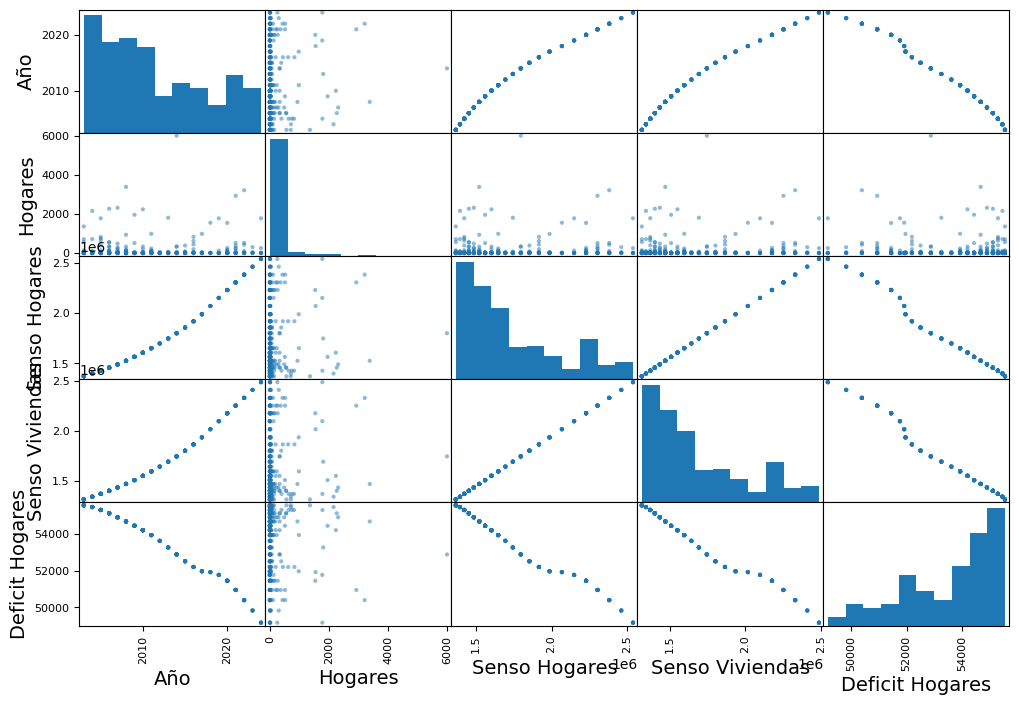

In [45]:
from pandas.plotting import scatter_matrix

attributes = ["Programa", "Estado de Postulación",
              "Año", "Hogares","Senso Hogares","Senso Viviendas", "Deficit Hogares","Categoria Estado"]
scatter_matrix(df_train_5[attributes], figsize=(12, 8))
plt.show()

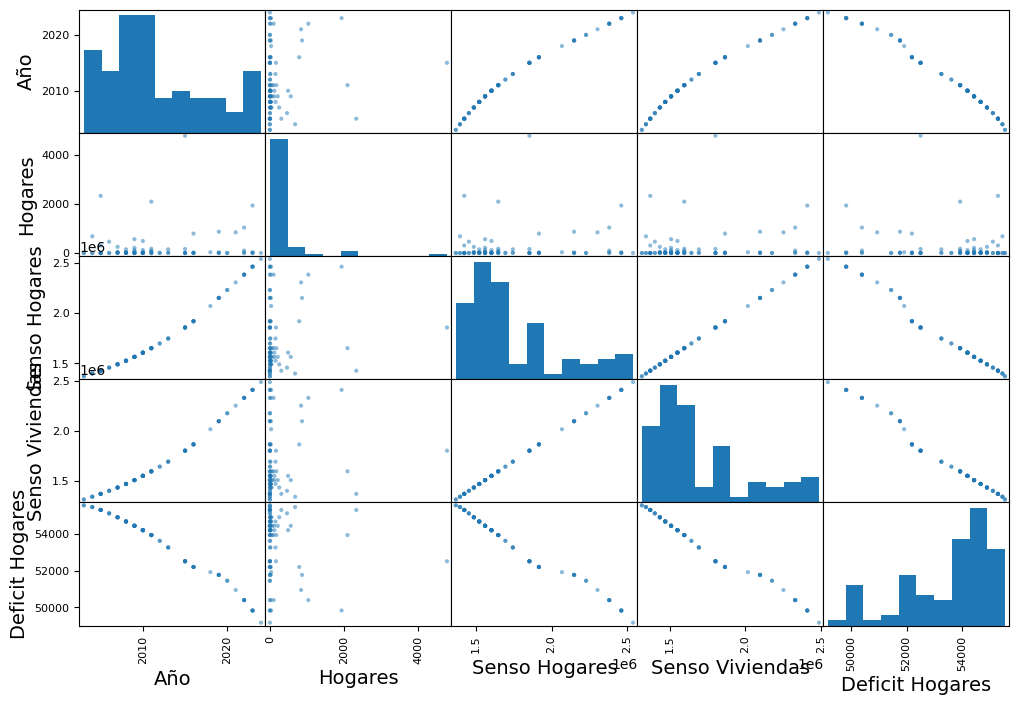

In [46]:
from pandas.plotting import scatter_matrix

attributes = ["Programa", "Estado de Postulación",
              "Año", "Hogares","Senso Hogares","Senso Viviendas", "Deficit Hogares","Categoria Estado"]
scatter_matrix(df_test_5[attributes], figsize=(12, 8))
plt.show()

## selección de caracteristicas

In [47]:
# 
X = df_train_5[["Programa", "Año", "Valor Asignado", "Deficit Hogares", "Categoria Estado"]]
y = df_train_5["Hogares"]

### preprosesamiento


In [48]:
# divide categoricas y numericas
cat_features = ["Programa", "Categoria Estado"]
num_features = ["Año", "Valor Asignado", "Deficit Hogares"]

In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


# escalar las caracteristicas numericas
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()   
)

In [50]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore')
)

In [51]:
# Crear un solo transformardor que maneje las variables categóricas y las numéricas
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

## Entrenar el modelo

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
# Utilice grid search o random search para probar diferentes hiperparámetros
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# definir el pipeline
randon_clf = make_pipeline(
    full_pipeline,
    RandomForestRegressor(n_estimators=150,random_state=26)
)

randon_clf.fit(X=X,y=y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Año', 'Valor Asignado',
                                                   'Deficit Hogares']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Programa',
                                                   'Categoria Estado'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=150, random_state=26))])

In [54]:
# evaluar el modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = randon_clf.predict(X=df_test_5[["Programa", "Año", "Valor Asignado", "Deficit Hogares", "Categoria Estado"]])
mean_squared_error(df_test_5["Hogares"], y_pred)
mean_absolute_error(df_test_5["Hogares"], y_pred)

print(mean_squared_error(df_test_5["Hogares"], y_pred), np.sqrt(mean_squared_error(df_test_5["Hogares"], y_pred)))
print(mean_absolute_error(df_test_5["Hogares"], y_pred))

60743.88711515151 246.46274995453473
64.26318181818182


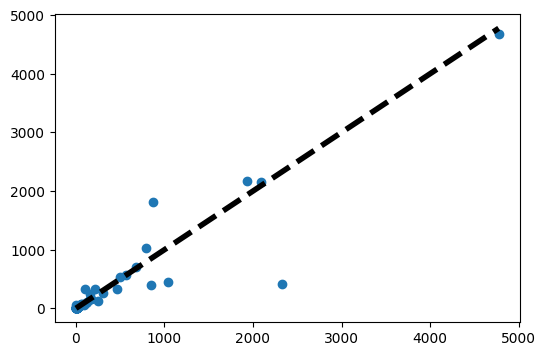

In [55]:
# muestra grafica con los resultados
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_test_5["Hogares"], y_pred)
ax.plot([df_test_5["Hogares"].min(), df_test_5["Hogares"].max()], [df_test_5["Hogares"].min(), df_test_5["Hogares"].max()], 'k--', lw=4)

### Aplicar Modelo con gridSearch

In [56]:
## aplicar hiperparametros
from sklearn.ensemble import RandomForestRegressor

from  sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rnd_regressor_gs =  make_pipeline(full_pipeline,
                                 RandomForestRegressor(random_state=26))

In [57]:
# definir hiperparametros
param_grid = {
    'randomforestregressor__n_estimators': [100, 150, 200, 250, 300],
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
    'randomforestregressor__max_depth': [10,20],
}

In [58]:
grid_search = GridSearchCV(rnd_regressor_gs, param_grid, cv=5,n_jobs=-1, verbose=1)

In [59]:
grid_search.fit(X=X, y=y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/home/diegofernando/.pyenv/versions/data_my_house/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/home/diegofernando/.pyenv/versions/data_my_house/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/diegofernando/.pyenv/versions/data_my_house/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/h

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Año',
                                                                          'Valor '
                                                                          'Asignado',
                                                                          'Deficit '
                                                                          'Hogares']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Programa',
                                                                          'Categoria '
                                                                          'Estado'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=26))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [10, 20],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                         'randomforestregressor__n_estimators': [100, 150, 200,
                                                                 250, 300]},
             verbose=1)

In [60]:
# obtener los mejores parametros:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores parámetros: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__n_estimators': 100}
Mejor puntuación: 0.7760312807173962


In [61]:
# obtener el mejor modelo
best_model = grid_search.best_estimator_
best_model.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Año', 'Valor Asignado',
                                                   'Deficit Hogares']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Programa',
                                                   'Categoria Estado'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       random_state=26))])

In [62]:
# evaluar el mejor modelo
y_pred = best_model.predict(X=df_test_5[["Programa", "Año", "Valor Asignado", "Deficit Hogares", "Categoria Estado"]])
print("y_pred",y_pred)
mean_squared_error(df_test_5["Hogares"], y_pred)

y_pred [1.49130000e+02 1.04250952e+01 1.00729135e+01 1.48364286e+01
 9.82842857e+00 1.05585644e+01 1.55291036e+01 2.87541036e+01
 4.15880000e+02 7.68026217e+00 2.56945455e+01 5.59276872e+00
 3.24750000e+02 5.53660000e+02 2.33670952e+01 1.01524735e+01
 1.86419000e+03 8.31616667e+01 6.73750000e+02 3.63165000e+02
 5.61480000e+02 2.45894481e+01 1.60326667e+01 4.11983824e+01
 4.22366667e+01 3.60321429e+01 1.14680000e+02 2.04566667e+01
 2.81127778e+01 2.03960134e+01 4.09804902e+00 2.71142857e+01
 3.70564286e+01 1.19881190e+01 4.37116667e+01 1.36917857e+00
 5.99044444e+00 1.57800000e+01 1.27879841e+01 3.71348413e+00
 3.74483000e+03 1.42040000e+02 1.03100000e+01 6.46622619e+00
 1.34353409e+01 5.69221569e+00 2.79799288e+01 1.00380000e+02
 8.52369697e+00 4.23980952e+00 1.36800000e+01 1.78018182e+01
 1.34325000e+03 1.36625689e+01 1.35687143e+02 5.95170000e+02
 2.29080000e+02 1.22591770e+01 8.01500000e+00 6.31055159e+01
 8.98371429e+01 1.10610238e+02 2.22290000e+02 1.20167619e+01
 2.17214000e+03 2

np.float64(74665.53140320745)

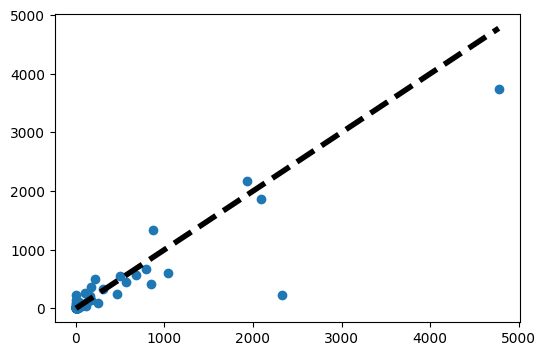

In [63]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_test_5["Hogares"], y_pred)
ax.plot([df_test_5["Hogares"].min(), df_test_5["Hogares"].max()], [df_test_5["Hogares"].min(), df_test_5["Hogares"].max()], 'k--', lw=4)

In [64]:
# prueba con un nuevo dato
nuevo_programa = ["Programa 1", 2023, 85000000,49150, "No ejecutado"]
# convertir a dataframe
nuevo_programa = pd.DataFrame([nuevo_programa], columns=["Programa", "Año", "Valor Asignado", "Deficit Hogares", "Categoria Estado"])

nuevo_programa.head()
# best_model.predict(X=[nuevo_programa])

,Programa,Año,Valor Asignado,Deficit Hogares,Categoria Estado
0,Programa 1,2023,85000000,49150,No ejecutado
